In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ML datasets/Country-data_clustering.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
x_data = df.drop(columns=['country'])

In [7]:
def normalise(df,cols=[]):
    for col in cols:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [8]:
x_norm = normalise(x_data, x_data.columns)

In [10]:
x_norm

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692
...,...,...,...,...,...,...,...,...,...
162,-0.224902,0.200315,-0.569997,0.239979,-0.736313,-0.488315,-0.849606,0.364658,-0.545273
163,-0.524935,-0.459980,-0.693776,-1.209860,-0.033442,3.606020,0.544723,-0.315728,0.029235
164,-0.371199,1.126916,0.008851,1.375892,-0.656429,0.408503,0.286097,-0.659224,-0.635842
165,0.447072,-0.405259,-0.595481,-0.515920,-0.656948,1.496416,-0.343599,1.137523,-0.635842


In [11]:
scores= []
for i in range(2,11):
    kmean = KMeans(n_clusters=i, n_init='auto', random_state=42)
    clusters = kmean.fit_predict(x_norm)
    silhoutte = silhouette_score(x_norm, clusters)
    scores.append(silhoutte)

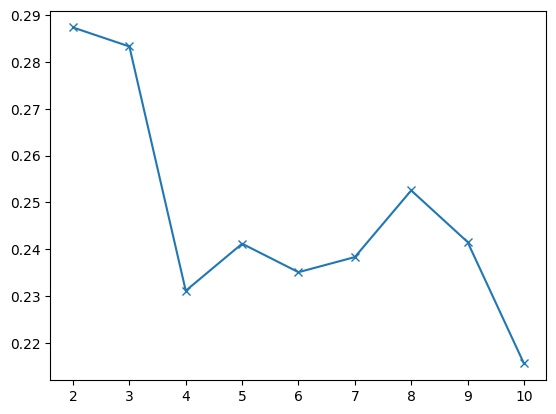

In [12]:
plt.plot(range(2,11), scores, marker='x', )

In [18]:
kmean = KMeans(n_clusters=2, n_init='auto',random_state=42)

pca = PCA(2)

pca_df = pca.fit_transform(x_norm)

pred = kmean.fit_predict(pca_df)
center = kmean.cluster_centers_

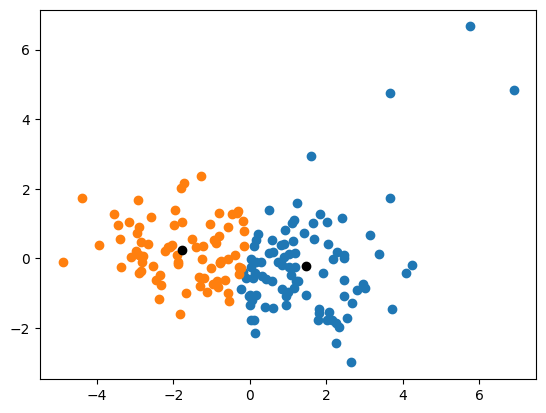

In [19]:
for i in np.unique(pred):
    plt.scatter(pca_df[pred==i, 0], pca_df[pred==i, 1], label=f'Cluster{i}')
plt.scatter(center[:,0], center[:,1], color='k')
plt.show()